# Loading packages

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
#from keras.datasets import imdb

from google.colab import files

# Data preprocessing

In [3]:
data = files.upload()

Saving feedback.csv to feedback.csv


In [0]:
df = pd.read_csv('feedback.csv', sep=',', names=['rating','product_id','name','date','feedback1', 'feedback2','feedback3'], skiprows=1)

In [0]:
feedbacks = ['feedback1', 'feedback2', 'feedback3']
for column in feedbacks:
  df[column].replace(np.nan, '', inplace=True)

In [0]:
df['full_feedback']= df.feedback1 + ' ' + df.feedback2 + ' ' + df.feedback3

In [0]:
df.drop(columns=feedbacks, inplace=True)

In [0]:
df.rating = np.round(df.rating) #as was shown in eda there are only about 200 observations which values deviate from integer

In [18]:
df.head()

,rating,product_id,name,date,full_feedback
0,1.0,8342,Александр,2017-04-12,"6 входов, предохранитель искрит при включении ..."
1,5.0,8342,Елена,2015-08-04,Я являюсь пользователем Пилотов уже больше 10 ...
2,5.0,5311,Леонид,2017-07-16,"хорошо мелет маркий, остаются следы Использую ..."
3,4.0,5311,Сергей,2017-06-28,Компактная Не нашел Работает на ура. В инструк...
4,5.0,5311,Ольга,2017-01-21,Цена и качество Нет В использовании 2 месяца п...


In [0]:
tokenizer = text.Tokenizer(num_words=40000)

In [0]:
tokenizer.fit_on_texts(df.full_feedback)

In [0]:
sequences = tokenizer.texts_to_sequences(df.full_feedback)

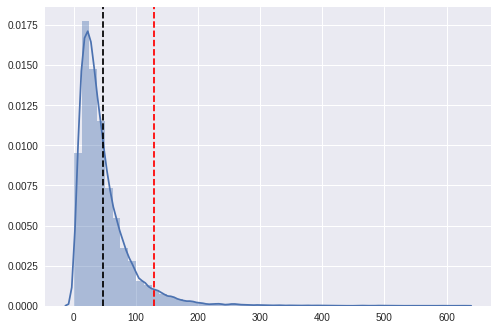

129.0


In [67]:
sns.distplot(list(map(len, sequences)))
plt.axvline(np.mean(list(map(len, sequences))), color="k", linestyle="--")
plt.axvline(np.percentile(list(map(len, sequences)), 95), color="red", linestyle="--")
plt.show()
print(np.percentile(list(map(len, sequences)), 95))

The red line on the graph above shows the length of feedbacks (129) that covers 95% of all observations

In [0]:
most_length = 129
padded_seq = sequence.pad_sequences(sequences, maxlen=most_length)

## Train-validation-test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(padded_seq, df.rating, random_state=42)

# Model building

In [75]:
#dont forget to add random weights initialization
model = Sequential()
model.add(Embedding(40000, 128, input_length=most_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='elu'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train,
          batch_size=200,
          epochs=4,
          validation_data=[X_test, y_test])

Train on 13756 samples, validate on 4586 samples
Epoch 1/4
13756/13756 [==============================] - 81s 6ms/step - loss: 4.6850 - mean_absolute_error: 1.6482 - val_loss: 1.5544 - val_mean_absolute_error: 0.9871
Epoch 2/4
13756/13756 [==============================] - 78s 6ms/step - loss: 1.4108 - mean_absolute_error: 0.9234 - val_loss: 1.0906 - val_mean_absolute_error: 0.7325
Epoch 3/4
13756/13756 [==============================] - 79s 6ms/step - loss: 0.8128 - mean_absolute_error: 0.7004 - val_loss: 0.9462 - val_mean_absolute_error: 0.7143
Epoch 4/4
13756/13756 [==============================] - 78s 6ms/step - loss: 0.5714 - mean_absolute_error: 0.5924 - val_loss: 0.9833 - val_mean_absolute_error: 0.6918
